In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
directory = 'genetic_drift_onepanel/'
files = [file for file in os.listdir('genetic_drift_onepanel/') if 'results' in file]

In [4]:
with open('genetic_drift_onepanel/paramgrid_genetic_drift_short.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [5]:
df_param_grid = pd.DataFrame(param_grid)

In [10]:
m_range = sorted(list(set(df_param_grid['m'])))[::-1]
m_range.remove(20000)

a1_range = sorted(list(set(df_param_grid['ap'])))
a1_range.remove(7.7)

In [11]:
matrix_genetic_drift = np.zeros((20,20))

for mind in range(20):
    for a1ind in range(20):
        
        search_control = df_param_grid[(df_param_grid['m'] == m_range[mind]) & (df_param_grid['ap'] == a1_range[a1ind]) & (df_param_grid['qd'] == 1-1e-6)]
        search_treat = df_param_grid[(df_param_grid['m'] == m_range[mind]) & (df_param_grid['ap'] == a1_range[a1ind]) & (df_param_grid['qd'] == 1-3e-6)]
        
        index_paramgrid_control = list(search_control.index)[0]
        index_paramgrid_search = list(search_treat.index)[0]

        with open('genetic_drift_onepanel/results_genetic_drift_'+str(index_paramgrid_control)+'.txt', 'rb') as f:
            result_control = np.array(pickle.load(f)['result'])
        with open('genetic_drift_onepanel/results_genetic_drift_'+str(index_paramgrid_search)+'.txt', 'rb') as f:
            result_search = np.array(pickle.load(f)['result'])
        
        probability_ERF = sum(result_control[:,1] < result_search[:,1])/1000
        
        matrix_genetic_drift[mind, a1ind] = probability_ERF

In [12]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

def calculate_ticks_log(ticklabels, truerange, tickrange):
    tick_labels = np.log(ticklabels)
    true_range = np.log(truerange)
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

param_ticks = {'m':[1500,5000,10000,15000,20000,25000,29900],
               'n':[1,200,400,600,800,1000],
               'ap':[7.7,8.0,8.3,8.6,8.8],
               'qd':[1-1e-6,1-3e-6,1-5e-6,1-7.5e-6,1-1e-5], 
               'ttr':[0,3,7,10,14]}
param_ranges = {'m':[1500,29900],
                'n':[1,1000],
                'ap':[7.7,8.8],
                'qd':[1e-6,1e-5],
                'ttr':[0,14]}

In [13]:
mticks_pos = calculate_ticks(np.array(param_ticks['m']), param_ranges['m'][::-1], [0,19])
a1ticks_pos = calculate_ticks(np.array(param_ticks['ap']), param_ranges['ap'], [0,19])

Text(0, 0.5, 'Proportion of runs where evolutionary safety achieved')

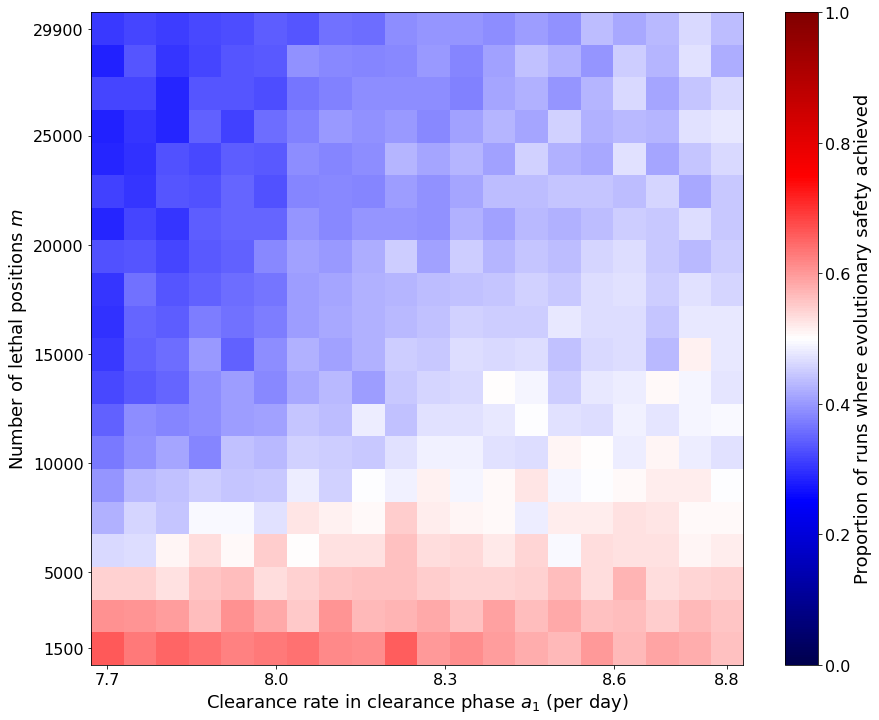

In [14]:
fig, ax = plt.subplots(figsize = (15,12))

im = ax.imshow(matrix_genetic_drift, vmin = 0, vmax = 1, cmap = 'seismic')

ax.set_yticks(mticks_pos)
ax.set_yticklabels(param_ticks['m'], fontsize = 16)

ax.set_xticks(a1ticks_pos)
ax.set_xticklabels(param_ticks['ap'], fontsize = 16)

ax.set_xlabel('Clearance rate in clearance phase $a_1$ (per day)', fontsize = 18)
ax.set_ylabel('Number of lethal positions $m$', fontsize = 18)

cbar = plt.colorbar(im)

cbar.set_ticks(np.arange(0,1.01,0.2))
cbar.ax.tick_params(labelsize = 16)
cbar.ax.set_ylabel('Proportion of runs where evolutionary safety achieved', fontsize = 18)

#plt.savefig('genetic_drift_results_7FEB.jpg', dpi = 600, bbox_inches = 'tight')